# <span style="color:green">Data Visualization with Bokeh</span>

### <span style="color:brown">PyHEP 2021 (virtual) Workshop</span>

### <span style="color:salmon">Author:</span> Bruno Alves | <span style="color:salmon">Date:</span> 6 July 2021

## Disclaimers

1. This tutorial is heavily opinionated: the "best" plotting library can be different for different people with different needs 
 - but ```bokeh``` is the best for me, and I will try to justify it

2. I am in now way involved with the development of ```bokeh```; I am simply a user, just like most of you

3. I am far from being an expert on the topics and libraries covered: please correct me if I say something wrong

# Motivation


 1. Get people to know, enjoy and use ```bokeh```

  - Does not seem to be popular in HEP. However:
      - LHCb uses it for [data quality monitoring](https://cds.cern.ch/record/2298467)
      - It was [mentioned](https://arxiv.org/abs/1811.10309) by the [HEP Software Foundation](https://hepsoftwarefoundation.org/) (but dismissed; fortunately their reasons are now completely outdated)

  - It is known in other areas,  <span style="color:brown">Astrophysics</span> and  <span style="color:brown">Biology</span> for example

 - As other plotting alternatives, it is shadowed by the ubiquitousness of ```matplotlib``` 

 2. ```bokeh``` code, when compared to ```matplotlib``` (personal opinion, of course):

 - is more readable

 - is easier to write without constantly resorting to the documentation 

 - gives simple interactive plots for free

 - can be used for easily creating and sharing complex and virtually unlimited interactive visualizations/dashboards

```matplotlib``` is still more popular because:

  - it is older (started in 2003, vs. 2013 for ```bokeh```) and has more features than current alternatives

   - people have the tendency to resist change

   - most default examples for anything on StackOverflow use ```matplotlib```:

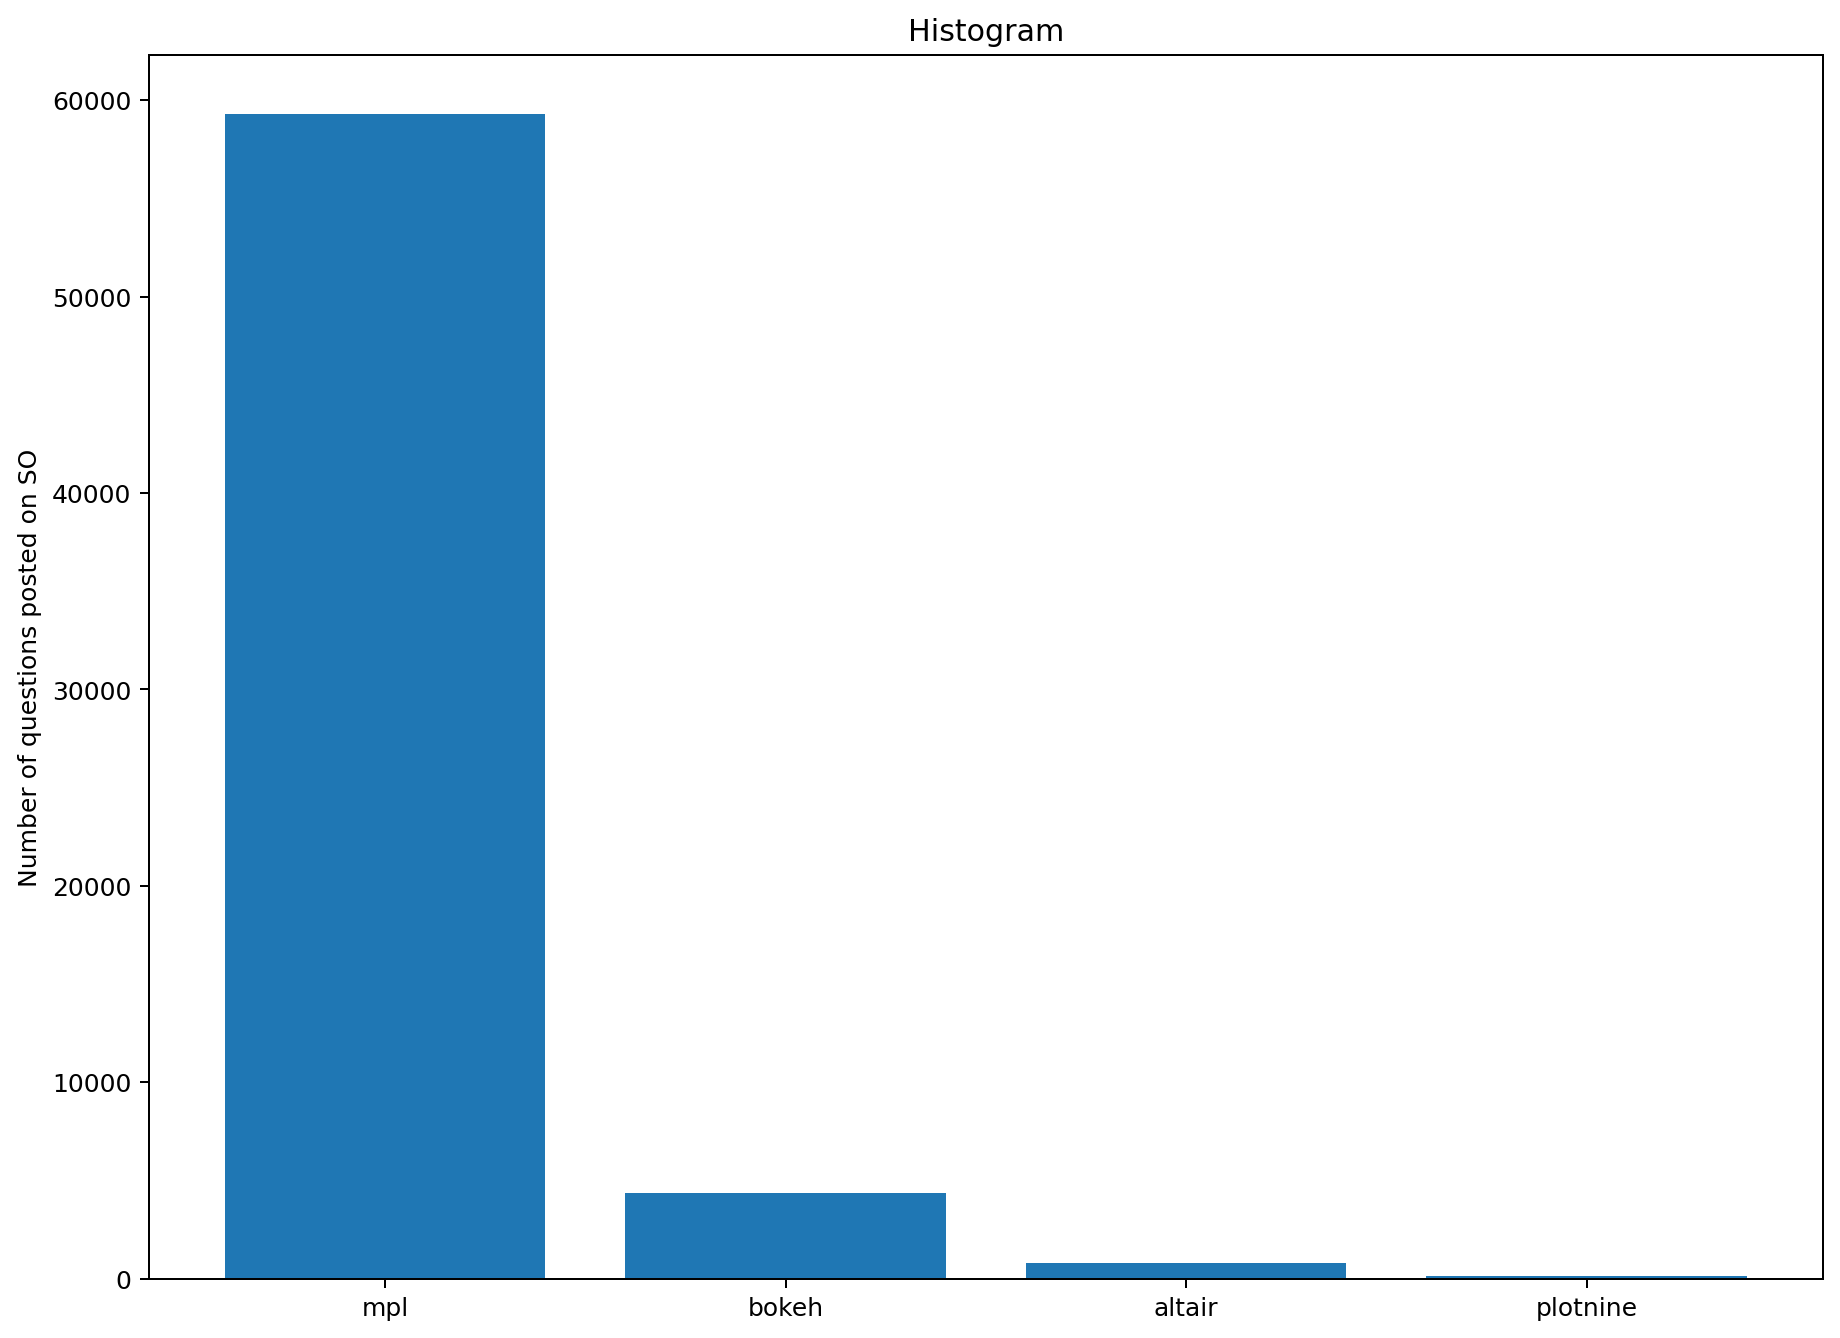

In [57]:
import numpy
from matplotlib import pyplot as plt
%matplotlib inline
#requires ipympl
#%matplotlib widget
plt.rcParams['figure.dpi'] = 180

nquestions=[59322, 4355, 767, 127]
libs=['mpl', 'bokeh', 'altair', 'plotnine']

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.bar(libs, nquestions)
ax.set_ylabel('Number of questions posted on SO')
plt.title('Histogram')
plt.show()

In [43]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

nquestions=[59322, 4355, 767, 127]
libs=['mpl', 'bokeh', 'altair', 'plotnine']

p = figure(plot_height=600, plot_width=800,
           title='Histogram', 
           x_range=libs)
p.vbar(x=libs, top=nquestions, width=0.9)
p.yaxis.axis_label = 'Number of questions posted on SO'
show(p) 

Loading BokehJS ...

# Basic plotting

### We will be comparing:

- [matplotlib](https://matplotlib.org/stable/index.html)
- [bokeh](https://bokeh.org/)
- [plotnine](https://plotnine.readthedocs.io/en/stable/index.html)
- [altair](https://altair-viz.github.io/)

#### when performing arguably two of the most common plots:

- line plot
- histogram

We start by defining everything that will be common to all libraries:

In [58]:
import numpy as np
from types import SimpleNamespace

#data for line plots
dline = SimpleNamespace( x=[1,2,3,4,5,6,7,8,9], 
                         y=[6,7,2,8,9,3,4,5,1],
                         size=15,
                         line_color='blue',
                         out_color='red', 
                         fill_color='orange',
                         fill_alpha=1 )

#data for histograms
mu, sigma, npoints = 0, 0.5, 1000
nbins = 35
dhist = np.random.normal(mu, sigma, npoints)
hist_, edges_ = np.histogram(dhist, density=False, bins=nbins)
dhist = SimpleNamespace( data=dhist, hist=hist_, edges=edges_, nbins=nbins)

## ```matplotlib```

- popular
- mature (started in 2003)

- multiple APIs for the same things
- unreliable documentation
- provides a sometimes unpythonic syntax (originally based on Matlab)

In [59]:
import matplotlib.pyplot as plt

#### Line plot:

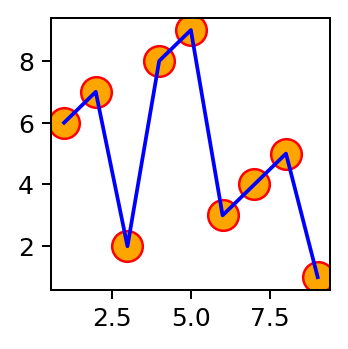

In [63]:
plt.figure(figsize=(2.,2.))

plt_marker_options = dict(s=10*dline.size, color=dline.fill_color, marker='o',
                          edgecolor=dline.out_color,
                          alpha=dline.fill_alpha)

plt.plot(dline.x, dline.y, color=dline.line_color)
plt.scatter(dline.x, dline.y, **plt_marker_options)
plt.show()

#### Histogram ([multiple APIs](https://matplotlib.org/stable/api/index.html)):

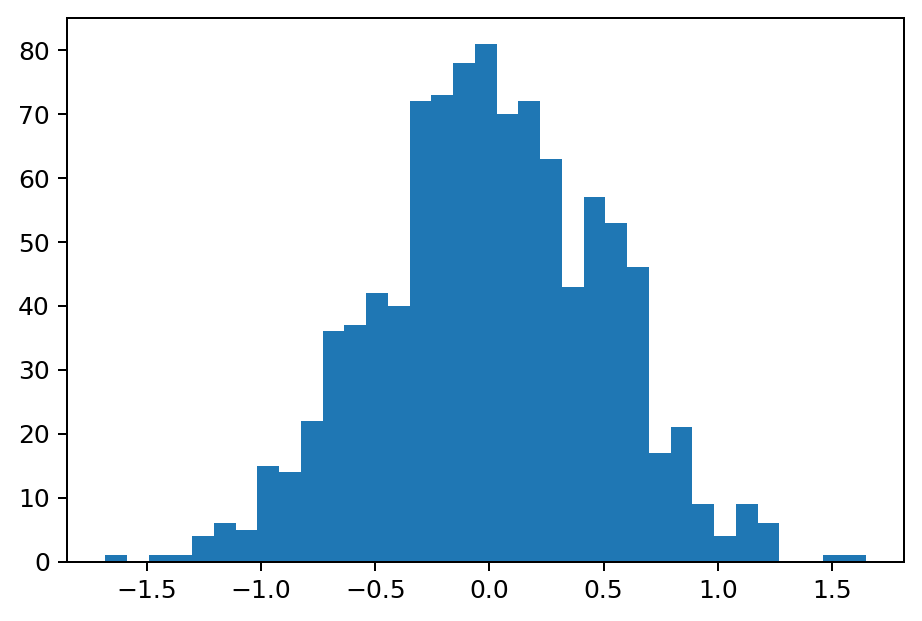

In [71]:
plt.hist(dhist.data, bins=dhist.nbins)
plt.show()

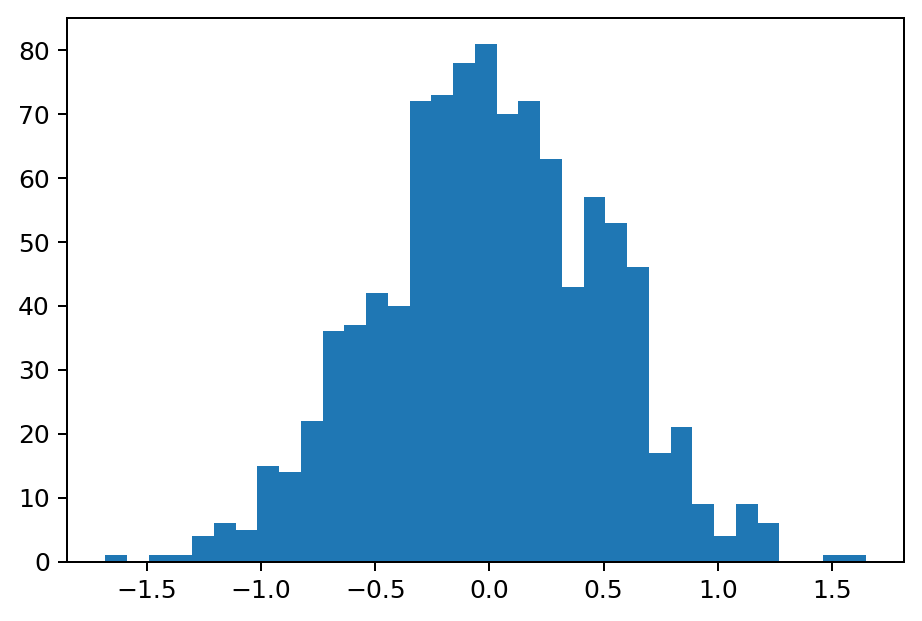

In [72]:
#fig, ax = plt.subplots(figsize=(5,4))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(dhist.data, bins=dhist.nbins)
plt.show()
#we can create Figure and Axes instances explicitly

## Remarks

- ```Figure``` and ```Axes``` are a source for confusion

- It becomes quite complex to build a visualization dashboard tool (this is very easy with ```bokeh```; we will get there)


- ```set_*``` methods are everywhere, where Python's ```property``` could be used instead

- Note that the functions we are calling are not based on what we are plotting, but instead on the actions we are performing (```plot``` and ```scatter``` instead of ```line``` and ```circles```):
   - less flexible/modular in the long-run
   - more complex to control and understand individual properties

- According to the [official documentation](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html), the preferred way to create a single figure is to call ```subplots()```!

## Conclusions


- I find ```matplotlib``` hard to use without constantly going back to the documentation, even for simple tasks.

  - I know many Python enthusiasts share this opinion.

- However, ```matplotlib``` is more mature and complete, being the oldest. In addition, some wrappers on top of it provide additional convenient functionalities, such as ```mplhep```.

- Unless what you want to do only exists in ```matplotlib```, I would suggest using ```bokeh``` for everything, including simple plots.

## ```bokeh```

- built around glyphs

In [73]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook() # alternatively one could use output_file()

Loading BokehJS ...

#### Line plot:

In [80]:
# create a new plot with default tools, using figure
pline = figure(plot_width=400, plot_height=400)

line_options = dict(line_width=2)
pline.line(dline.x, dline.y, **line_options)

marker_options = dict(size=dline.size, color=dline.out_color, 
                      fill_color=dline.fill_color, fill_alpha=dline.fill_alpha)
circ = pline.circle(dline.x, dline.y, **marker_options)

show(pline)

#### Histogram:

In [87]:
hist_options = dict(fill_color="yellow", line_color="black", alpha=.8)

phist = figure(title='Bokeh Histogram', plot_width=600, plot_height=400,
                background_fill_color="#2a4f32")

phist.quad(top=dhist.hist, bottom=0, left=dhist.edges[:-1], right=dhist.edges[1:], **hist_options)
phist.ygrid.grid_line_color = None

show(phist)

## ```altair```

- Includes interactive plots
- Build on top of [Vega-Lite](https://vega.github.io/vega-lite/) which is based on the "grammar of graphics" (used in R's ```ggplot2```):

The grammar of graphics creates plots based on the following layers:
- Data
- Mapping
- Statistical transformation
- Geometric object (markers)
- Position adjustment
- Some additional properties

```bokeh``` also relies on a "layered" approach, but:
- Mostly ignores data transformations
    - lots of excellent libraries can already take care of it
    - some exceptions: [transforming](https://docs.bokeh.org/en/latest/docs/user_guide/data.html#transforming-data), [filtering](https://docs.bokeh.org/en/latest/docs/user_guide/data.html#filtering-data)
    - as [highlighted](https://arxiv.org/pdf/1811.10309.pdf) (Sec. 2.2.3) by the HEP Soft. Found.: "**separating data visualization from the data analysis**" is a big open-issue in HEP
- Properties are directly associated to their related objects (figures, grid, axis, markers, ...) and are more intuitive to set

In [89]:
import altair as alt
import pandas as pd #altair data model is built around pandas

#### Line plot:

In [93]:
alt_source_line = pd.DataFrame({'x': dline.x, 'y': dline.y})

alt_line = alt.Chart(alt_source_line).mark_line().encode(x='x', y='y')

alt_marker_options = dict(color=dline.out_color, size=10*dline.size, fill=dline.fill_color, opacity=dline.fill_alpha)
alt_markers = alt.Chart(alt_source_line).mark_point(**alt_marker_options).encode(x='x', y='y')
                          
alt.layer(alt_line, alt_markers)

alt.LayerChart(...)

#### Histogram:

1. Use ```altair``` histogram utilities
 - the syntax is more complex

2. Decouple data transformations from plotting
 - use data processed by ```numpy```
 - ```bokeh``` mostly follows this "decoupling" approach
 


In [94]:
alt_src1 = pd.DataFrame({'data': dhist.data})
alt1 = alt.Chart(alt_src1).mark_bar().encode(
    alt.X('data:Q', bin=alt.Bin(extent=[-2,2],
                                maxbins=dhist.nbins)),
    y='count()',
)
alt1

alt.Chart(...)

In [95]:
alt_src2= pd.DataFrame({'hist':dhist.hist, 
                       'edges':dhist.edges[1:]})
alt2 = alt.Chart(alt_src2).mark_bar().encode(
    y='hist',
    x='edges',
)
alt2

alt.Chart(...)

Comparison with ```bokeh```:
 - the syntax is much less readable and intuitive
 - harder to customise
 - ```bokeh``` does not require ```pandas```
 - out-of-the box interaction (not explored in this talk, see [this](https://altair-viz.github.io/altair-tutorial/notebooks/06-Selections.html) for a nice example) is way more succint, at the cost of flexibility
- <span style="color:brown">efficiency/flexibility tradeoff</span>, where (in my opinion) ```bokeh``` comes out on top

From the "Zen of Python" (```import this```):

```
Flat is better than nested.
Readability counts.
Special cases aren't special enough to break the rules.
```

## ```plotnine```

- Also follows "the grammar of graphics"
- Contrary to ```altair```, this is basically a port of ```ggplot2``` to Python

#### Line plot:

In [96]:
import plotnine as p9

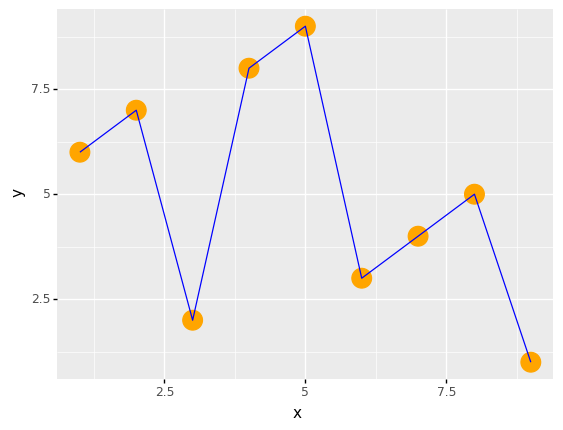

<ggplot: (8746503470785)>

In [99]:
#pandas is again required
p9_source_line = pd.DataFrame({'x': dline.x, 'y': dline.y})

(
    p9.ggplot(p9_source_line, p9.aes(x='x', y='y'))
    + p9.geom_point(color=dline.fill_color, size=0.5*dline.size) # markers
    + p9.geom_line(color=dline.line_color) # line plot
)

#### Histogram:

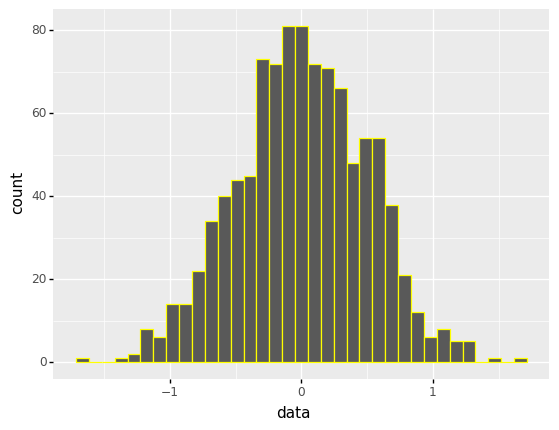

<ggplot: (8746503125170)>

In [100]:
p9_src1 = pd.DataFrame({'data': dhist.data})
(
    p9.ggplot(p9_src1, p9.aes(x='data'))
    + p9.geom_histogram(bins=dhist.nbins, color='yellow')
) 

- The syntax is very clear

- Unfortunately there are no out-of-the-box interactions available

- Just like for ```altair```, aesthetics are not very intuitive, at least for a beginner (there seems to be no easy way to control the color of the circle borders!)

## ```bokeh```: setting properties

Figure and object properties can be very easily customised:

In [101]:
#set figure properties
pline.title = 'Line Plot'
pline.xgrid.grid_line_color = 'red'
pline.yaxis.axis_label = 'Y Axis'
pline.outline_line_width = 2

#set glyph properties
#recall: circ = p_line.circle(data.x, data.y, **marker_options)
circ.glyph.line_color = "indigo"
circ.glyph.line_dash = [3,1]
circ.glyph.line_width = 4

show(pline)

One can search for specific properties in the documentation or else do:

In [102]:
from bokeh.models import Axis
print([x for x in vars(Axis) if x[:1] != "_"])

['bounds', 'ticker', 'formatter', 'axis_label', 'axis_label_standoff', 'major_label_standoff', 'major_label_orientation', 'major_label_overrides', 'major_label_policy', 'major_tick_in', 'major_tick_out', 'minor_tick_in', 'minor_tick_out', 'fixed_location', 'axis_label_text_line_height', 'axis_label_text_color', 'axis_label_text_font_size', 'axis_label_text_alpha', 'axis_label_text_font', 'axis_label_text_baseline', 'axis_label_text_align', 'axis_label_text_font_style', 'major_label_text_line_height', 'major_label_text_color', 'major_label_text_font_size', 'major_label_text_alpha', 'major_label_text_font', 'major_label_text_baseline', 'major_label_text_align', 'major_label_text_font_style', 'axis_line_dash', 'axis_line_dash_offset', 'axis_line_alpha', 'axis_line_join', 'axis_line_cap', 'axis_line_color', 'axis_line_width', 'major_tick_line_dash', 'major_tick_line_dash_offset', 'major_tick_line_alpha', 'major_tick_line_join', 'major_tick_line_cap', 'major_tick_line_color', 'major_tick_li

The same idea can be applied to ```Title```, ```Legend```, ```Toolbar```, ... [[more about models](https://docs.bokeh.org/en/latest/docs/reference/models.html)]

### Pros

- Intuitive syntax

- Very flexible

- Good [documentation](https://docs.bokeh.org/en/latest/docs/reference.html), many [examples](https://docs.bokeh.org/en/latest/docs/gallery.html#gallery) and [great tutorial](https://hub.gke2.mybinder.org/user/bokeh-bokeh-notebooks-asqwhfmf/notebooks/tutorial/00%20-%20Introduction%20and%20Setup.ipynb)

- Works well with jupyter notebooks

  - Active [community](https://discourse.bokeh.org/)

and, most importantly, provides interactivity:

- Easy to deploy and share high-quality (interactive) visualizations

- Simpler interactions come for free

- Lots of flexibility thanks to (optional) JavaScript callbacks

### Cons

- High-level charts were deprecated: building a tad more complex visualization can become time consuming the first time you do it. Possible solutions:
    - [HoloViews](https://holoviews.org/index.html)
    - [Chartify](https://github.com/spotify/chartify) (virtually no documentation, one [tutorial](https://github.com/spotify/chartify/blob/master/examples/Chartify%20Tutorial.ipynb))

- Less customisation than ```matplotlib```, although the difference is not noticeable for most use cases

- Javascript required for most interactive visualizations (very basic level)
    - If most of your ```bokeh``` code is in JavaScript you should consider other solutions ([D3](https://d3js.org/), for instance)
    - Hard to debug (please let me know if you are aware of a good solution!)


- The flexibility/time tradeoff might not be optimal in some scenarios (*e.g.* quick interactive plotting)

- No native 3D plots available (which are instead present in ```plotly``` and ```holoviews```)

- No support for inset plots (which are easily done with ```matplotlib```): current [feature request](https://github.com/bokeh/bokeh/issues/3821)

## Verdict

- Not everything is perfect, but if you must learn one visualization library only, ```bokeh``` should provide the best experience

- ```matplotlib``` will be still required in edge cases (but this never happened to me, and will become rarer and rarer as new ```bokeh``` [versions](https://docs.bokeh.org/en/latest/docs/releases.html) are released)

----------

- I have not mentioned ```plotly```, which shares the same cons as ```matplotlib```, and seems less flexible. It is however a very capable library in its own right.

Other ```bokeh``` features not explored in this talk:

- [data streaming](https://docs.bokeh.org/en/latest/docs/user_guide/data.html#appending-data-to-a-columndatasource)
- [mapping geo data](https://docs.bokeh.org/en/latest/docs/user_guide/geo.html)
- [embed plots in websites](https://docs.bokeh.org/en/latest/docs/user_guide/embed.html)
- [network graph visualization](https://docs.bokeh.org/en/latest/docs/user_guide/graph.html#userguide-graph)